In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
data = open('./boston.txt', 'r')
data

<_io.TextIOWrapper name='./boston.txt' mode='r' encoding='UTF-8'>

In [6]:
lines = data.readlines()
data.close()
lines

[" The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic\n",
 " prices and the demand for clean air', J. Environ. Economics & Management,\n",
 " vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics\n",
 " ...', Wiley, 1980.   N.B. Various transformations are used in the table on\n",
 ' pages 244-261 of the latter.\n',
 '\n',
 ' Variables in order:\n',
 ' CRIM     per capita crime rate by town\n',
 ' ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n',
 ' INDUS    proportion of non-retail business acres per town\n',
 ' CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n',
 ' NOX      nitric oxides concentration (parts per 10 million)\n',
 ' RM       average number of rooms per dwelling\n',
 ' AGE      proportion of owner-occupied units built prior to 1940\n',
 ' DIS      weighted distances to five Boston employment centres\n',
 ' RAD      index of accessibility to radial highways\n',
 ' TAX

In [7]:
headers = lines[7:21]
for i in range(len(headers)):
  headers[i] = headers[i].split(' ')[1]

headers

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [8]:
data = lines[22:]
fixed_data = []
for i in range(len(data)):
  if (i % 2 == 0):
    # normalise data
    row = (data[i] + data[i + 1]).split(' ')
    # remove empty values
    row = [eval(x.strip()) for x in row if x]
    fixed_data.append(row)

fixed_data

[[0.00632,
  18.0,
  2.31,
  0,
  0.538,
  6.575,
  65.2,
  4.09,
  1,
  296.0,
  15.3,
  396.9,
  4.98,
  24.0],
 [0.02731,
  0.0,
  7.07,
  0,
  0.469,
  6.421,
  78.9,
  4.9671,
  2,
  242.0,
  17.8,
  396.9,
  9.14,
  21.6],
 [0.02729,
  0.0,
  7.07,
  0,
  0.469,
  7.185,
  61.1,
  4.9671,
  2,
  242.0,
  17.8,
  392.83,
  4.03,
  34.7],
 [0.03237,
  0.0,
  2.18,
  0,
  0.458,
  6.998,
  45.8,
  6.0622,
  3,
  222.0,
  18.7,
  394.63,
  2.94,
  33.4],
 [0.06905,
  0.0,
  2.18,
  0,
  0.458,
  7.147,
  54.2,
  6.0622,
  3,
  222.0,
  18.7,
  396.9,
  5.33,
  36.2],
 [0.02985,
  0.0,
  2.18,
  0,
  0.458,
  6.43,
  58.7,
  6.0622,
  3,
  222.0,
  18.7,
  394.12,
  5.21,
  28.7],
 [0.08829,
  12.5,
  7.87,
  0,
  0.524,
  6.012,
  66.6,
  5.5605,
  5,
  311.0,
  15.2,
  395.6,
  12.43,
  22.9],
 [0.14455,
  12.5,
  7.87,
  0,
  0.524,
  6.172,
  96.1,
  5.9505,
  5,
  311.0,
  15.2,
  396.9,
  19.15,
  27.1],
 [0.21124,
  12.5,
  7.87,
  0,
  0.524,
  5.631,
  100.0,
  6.0821,
  5,
 

In [9]:
df = pd.DataFrame(data = fixed_data, columns=headers)

In [10]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [12]:
df.shape

(506, 14)

In [13]:
data = df.values[:, 0:13]
target = df['MEDV'].values[:]

In [14]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [15]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [23]:
regression_data = {}
for header in headers:
  if header != 'MEDV':
    regression_data[header] = df[header].values[:]

regression_data

{'CRIM': array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
        2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
        2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
        6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
        1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
        8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
        1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
        6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
        3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
        1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
        8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
        1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
        1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
        3.58400e-02, 4.37900e-02, 5.78900e-

In [24]:
len(regression_data)

13

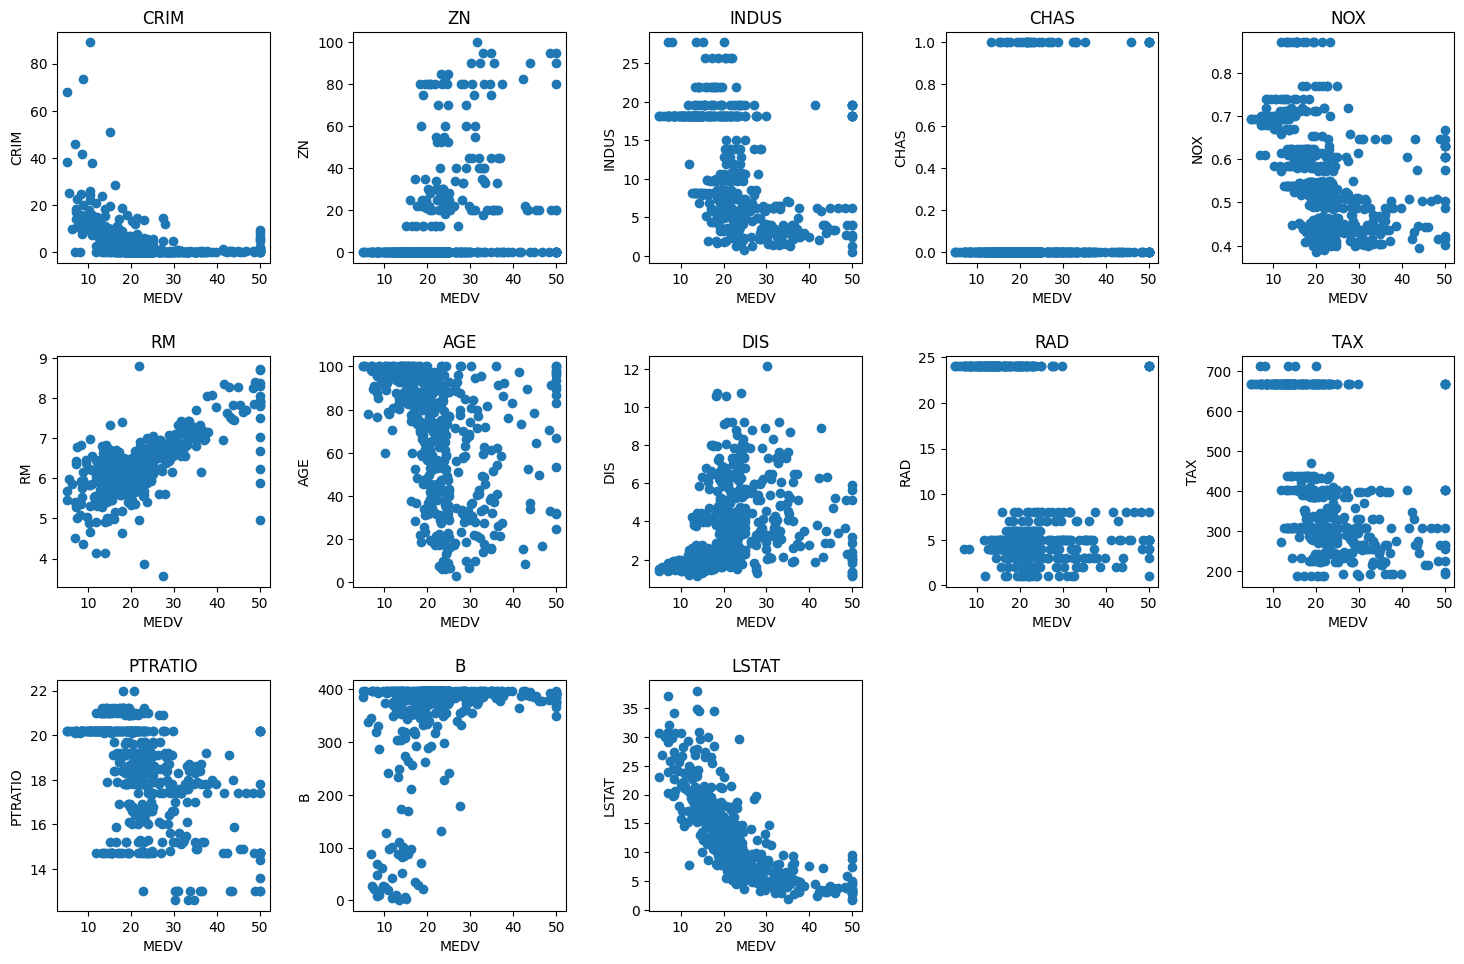

In [25]:
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
fig.delaxes(axs[2,4])
fig.delaxes(axs[2,3])
axs = np.array(axs)

for i, ax in enumerate(fig.axes):
  ax.scatter(target, regression_data[headers[i]])
  ax.set_ylabel(headers[i])
  ax.set_xlabel('MEDV')
  ax.set_title(headers[i])
fig.tight_layout(pad=2.0)



In [26]:
# target = np.log(target)
for data in regression_data:
  regression_data[data] = np.log(regression_data[data])


C:\Users\danbl\AppData\Local\Temp\ipykernel_11876\2904467572.py:3: RuntimeWarning: divide by zero encountered in log
  regression_data[data] = np.log(regression_data[data])


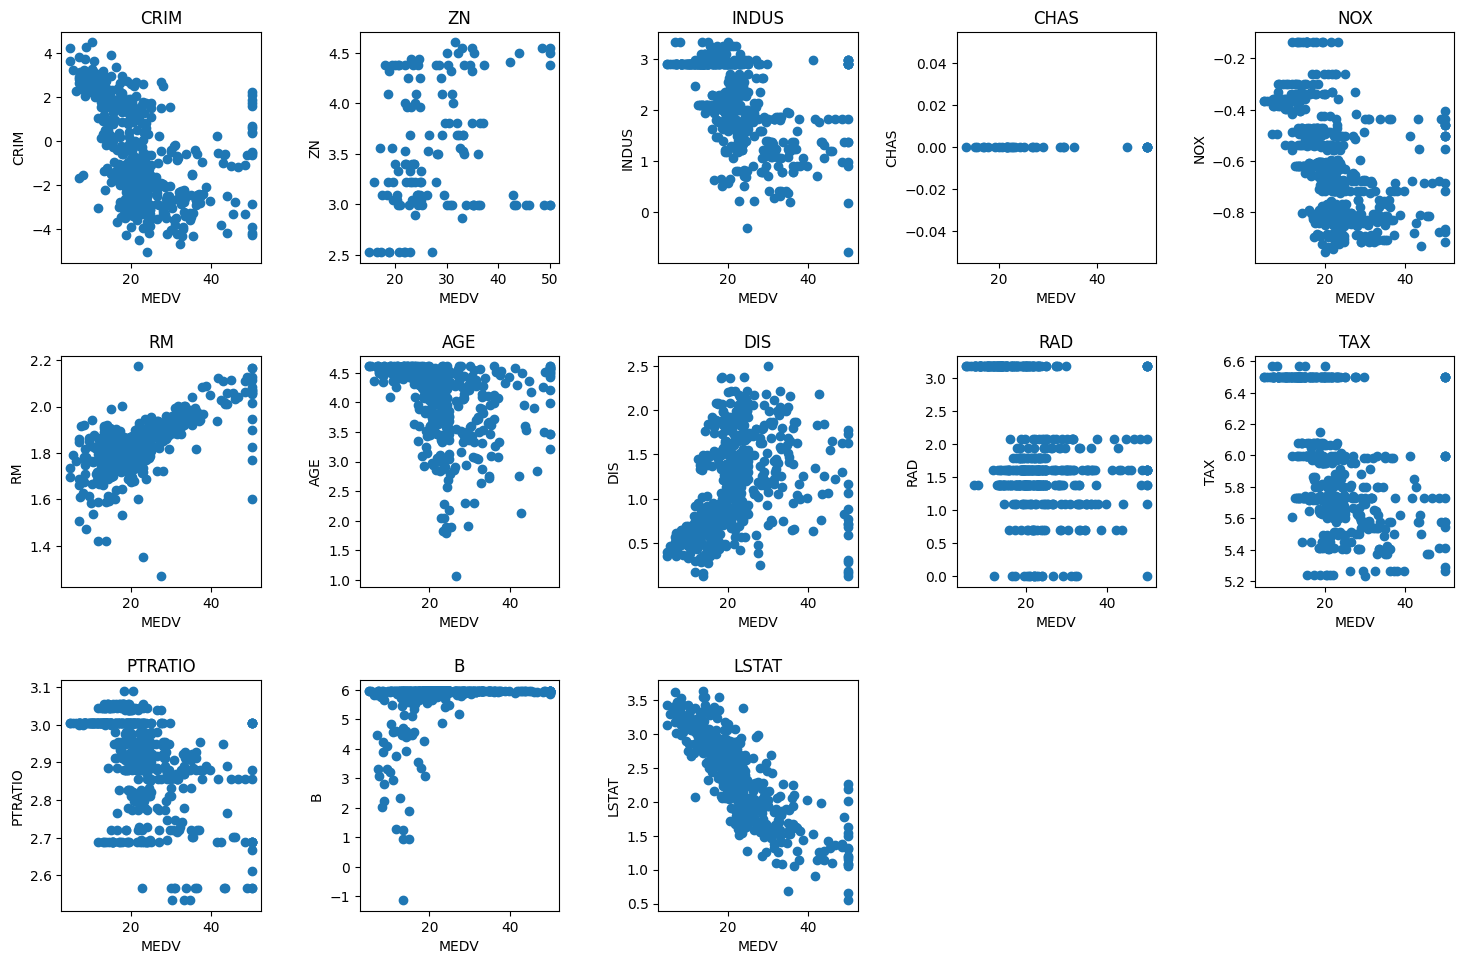

In [27]:
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
fig.delaxes(axs[2,4])
fig.delaxes(axs[2,3])
axs = np.array(axs)

for i, ax in enumerate(fig.axes):
  ax.scatter(target, regression_data[headers[i]])
  ax.set_ylabel(headers[i])
  ax.set_xlabel('MEDV')
  ax.set_title(headers[i])
fig.tight_layout(pad=2.0)

In [28]:
# for data in regression_data:
#   regression_data[data] = regression_data[data] - regression_data[data].mean()
target = target - target.mean()

In [29]:
models = {}
r = {}

for data_point in regression_data:
  print(data_point)
  print(regression_data[data_point])
  models[data_point] = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
  ])

  models[data_point].compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss="mse")

  def schedule(epoch, lr):
    if epoch >= 50:
      return 0.0001
    return 0.001

  scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

  r[data_point] = models[data_point].fit(target, regression_data[data_point], epochs=200, callbacks=[scheduler])


CRIM
[-5.06403607e+00 -3.60050234e+00 -3.60123494e+00 -3.43052321e+00
 -2.67292440e+00 -3.51157044e+00 -2.42712843e+00 -1.93412981e+00
 -1.55476035e+00 -1.77172158e+00 -1.49214389e+00 -2.14157230e+00
 -2.36680367e+00 -4.62416485e-01 -4.49479694e-01 -4.66186922e-01
  5.25260343e-02 -2.43091189e-01 -2.19761776e-01 -3.20480784e-01
  2.24574527e-01 -1.60121805e-01  2.09020286e-01 -1.16374532e-02
 -2.87335466e-01 -1.73710737e-01 -3.97630876e-01 -4.52379807e-02
 -2.57489167e-01  2.44700364e-03  1.22934190e-01  3.03594791e-01
  3.27856657e-01  1.41256477e-01  4.77984200e-01 -2.74621947e+00
 -2.32851848e+00 -2.52398017e+00 -1.74268363e+00 -3.58885314e+00
 -3.39352688e+00 -2.06010961e+00 -1.95545556e+00 -1.83658949e+00
 -2.09809443e+00 -1.76363859e+00 -1.66940025e+00 -1.47285493e+00
 -1.37093295e+00 -1.51517373e+00 -2.42215723e+00 -3.13798732e+00
 -2.92620621e+00 -2.99953951e+00 -4.29768549e+00 -4.33437998e+00
 -3.88489434e+00 -4.24609812e+00 -1.86788486e+00 -2.27031153e+00
 -1.90166362e+00 -1.

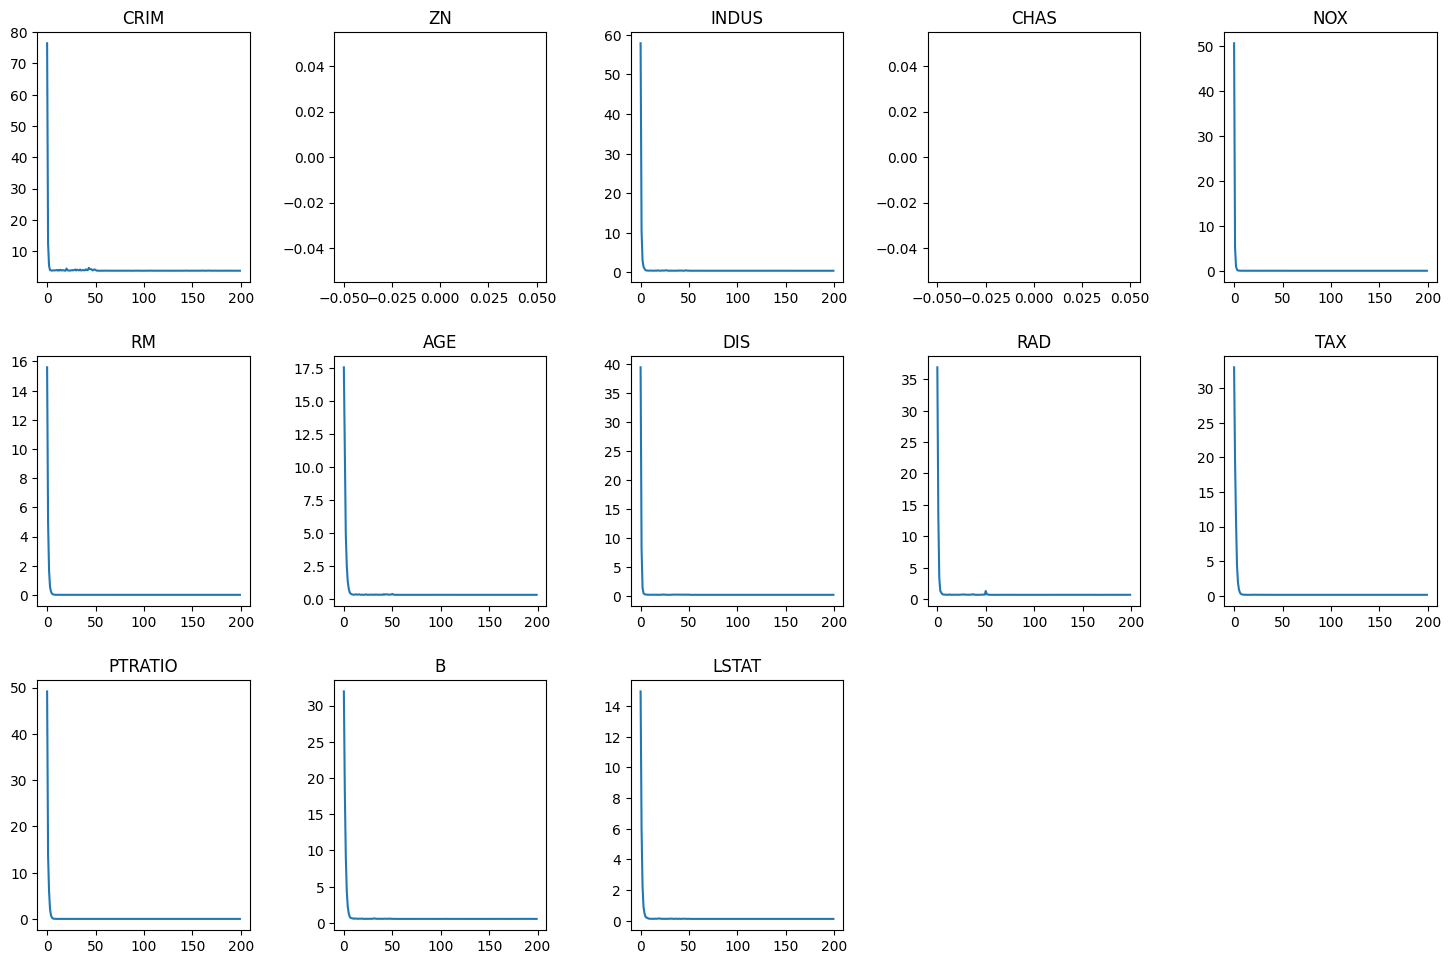

In [30]:
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
fig.delaxes(axs[2,4])
fig.delaxes(axs[2,3])
axs = np.array(axs)

for i, ax in enumerate(fig.axes):
  ax.plot(r[headers[i]].history['loss'], label='loss')
  ax.set_title(headers[i])
fig.tight_layout(pad=2.0)

16/16 [==============================] - 0s 867us/step


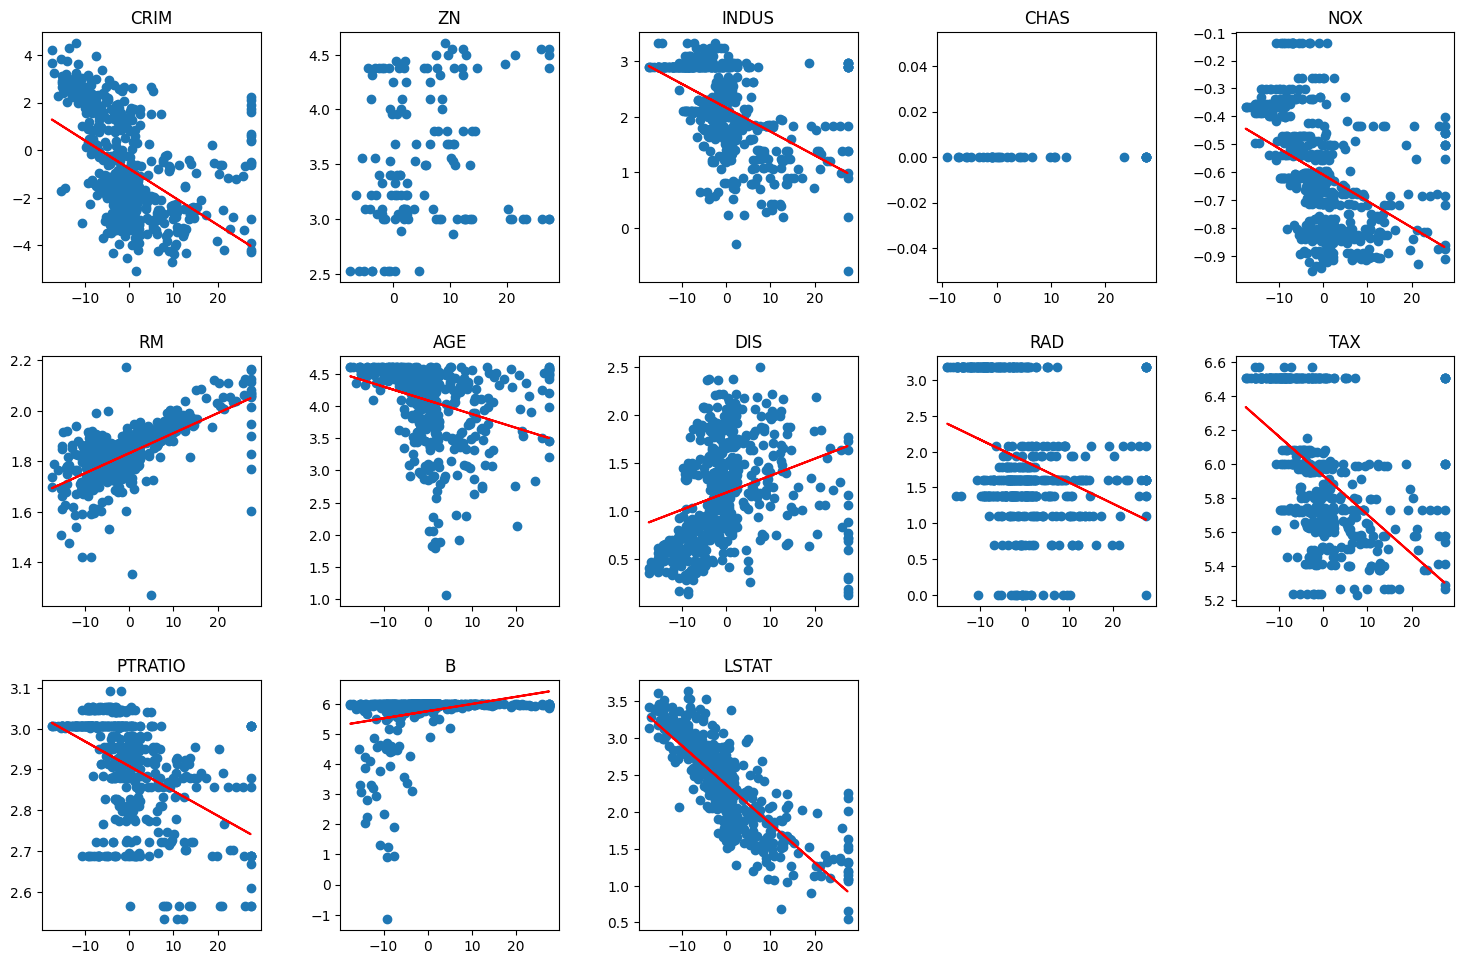

In [32]:
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
fig.delaxes(axs[2,4])
fig.delaxes(axs[2,3])
axs = np.array(axs)

for i, ax in enumerate(fig.axes):
  Yhat = models[headers[i]].predict(target).flatten()
  ax.scatter(target, regression_data[headers[i]])
  ax.plot(target, Yhat, color='red')
  ax.set_title(headers[i])
fig.tight_layout(pad=2.0)